$
    \newcommand{\RR}{\mathbf{R}}
    \newcommand{\dv}[3][]{\frac{d^{#1} #2}{d {#3}^{#1}}}
    \newcommand{\dwrt}[2][]{\frac{d^{#1}}{d {#2}^{#1}}}
    \newcommand{\pdv}[3][]{\frac{\partial^{#1} #2}{\partial {#3}^{#1}}}
    \newcommand{\pdwrt}[2][]{\frac{\partial^{#1}}{\partial {#2}^{#1}}}
    \newcommand{\dd}[2][]{\, d^{#1}#2}
    \newcommand{\qty}[1]{\left[#1 \right]}
    \renewcommand{\exp}[1]{e^{#1}}
    \newcommand{\qq}[1]{\qquad \text{#1}\qquad}
    \newcommand{\leadsto}{\quad & \implies \quad}
$

# MATH 310-10: Homework 2
- Submitted 9/22/17 by Colton Grainger for MATH 310-10: Ordinary Differential Equations, Engineering Outreach
- **Text:** *Differential Equations and Boundary Value Problems: Computing and Modeling* by C. Henry Edwards, David E. Penney and David Calvis, 5th Edition, Prentice Hall

## &sect; 1.5
### Prob 3
We find the general solution for the first order linear DE 
$$ 
    \dv{y}{x} + 3y  = 2x\exp{-3x}.
$$

Choose an integrating factor 
$$ 
    \mu(x) = \exp{\int 3 \dd{x}} = \exp{3x}.
$$

Multiplying both sides of the DE by $\mu$, we have
$$
    \exp{3x}\dv{y}{x} + \exp{3x}3y  = 2x.
$$

Now we integrate with respect to $x$. The RHS is merely $$x^2 + C.$$ 

For the LHS, 
\begin{align}
    \int\qty{\exp{3x}\dv{y}{x} + \exp{3x}3y} \dd{x}
        &= \int\dwrt{x}\qty{\exp{3x}y} \dd{x} &\text{(product rule)}\\
        &= \exp{3x}y. & \text{(FTC II)}
\end{align}

Whence 
\begin{align}
    \exp{3x}y = x^2 + C \leadsto
        y = \exp{-3x}(x^2 + C).
\end{align}

We plot solutions for various values of $C$.

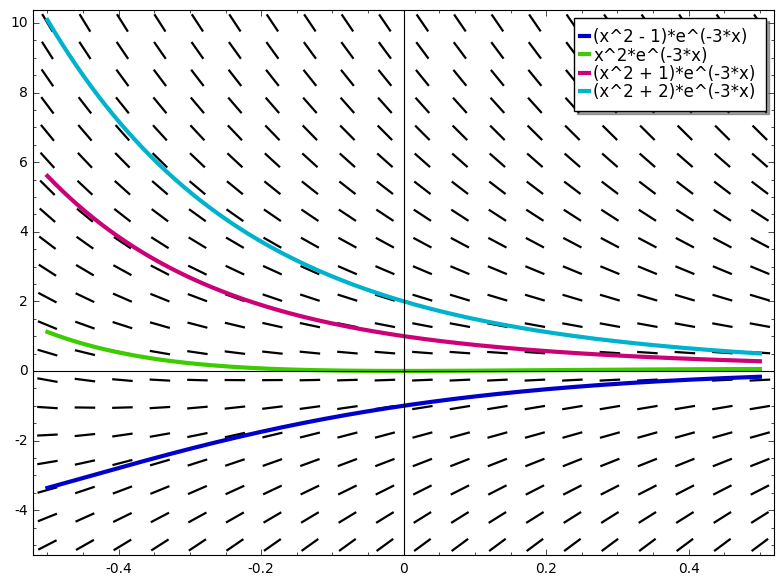

In [11]:
x, y, C = var('x y C')
f = 2*x*exp(-3*x) - 3*y
sf = plot_slope_field(
    f, 
    (x, -0.5, 0.5), 
    (y, -5, 10)
)
sols = plot(
    [exp(-3*x)*(x^2 + C) for C in [-1..2]], 
    (-0.5, 0.5), 
    thickness=3, 
    legend_label='automatic'
)
show(sf + sols)

### Prob 5

We solve the IVP $xy' +2y = 3x$ with $y(1) = 5$.

Well, suppose $x \neq 0$ and divide out $x$,
$$
    y' + \frac2x\,y = 3.
$$

Let $\mu(x) = \exp{\int2\dd{x}/x} = x^2$. Then write
$$
    \displaystyle
    \dwrt{x}\qty{\mu y} = 3\mu \implies
        y(x) = \frac1{x^2}\qty{x^3 + C}.
$$

With the IC $y(1) = 5$, we've $C = 4$, whence 
$$
    y(x) = x + \frac4{x^2}.
$$

### Prob 27

We solve the DE 
$$
    (x+y\exp{y})\dv{y}{x} = 1
$$
regarding $y$ as the independent variable rather than $x$.

As we want an inverse function $x(y)$, we'd better satisfy the conditions of the inverse function theorem. I.e., we'll assume $\dv{y}{x} \neq 0$ for all real $x$.

It can be shown that $\dv{y}{x} = \qty{\dv{x}{y}}^{-1}$. Whence the DE is seen to be 
$$
    \dv{x}{y} - x  = y\exp{y},
$$
a first order linear DE in $y$.

Let $\mu(y) = \exp{\int-\dd{y}} = \exp{-y}$. Using the method of integrating factors, we find the general solution
$$
    \mu x = \int y \dd{y} = \frac{y^2}2 + C \implies x(y) = \exp{y}\qty{\frac{y^2}2 + C}.
$$


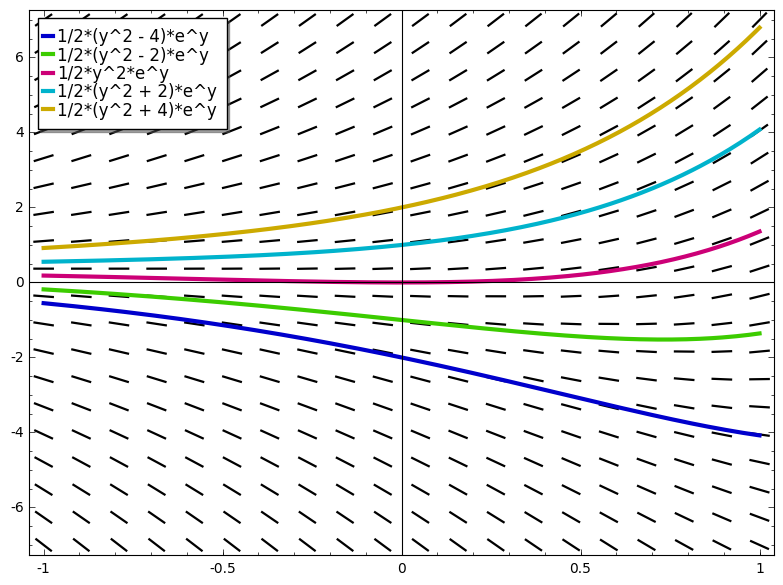

In [19]:
x, y, C = var('x y C')
f = y*exp(y) + x
sf = plot_slope_field(
    f, 
    (y, -1, 1),
    (x, -7, 7)
)
sols = plot(
    [exp(y)*((y^2)/2 + C) for C in [-2..2]], 
    (-1, 1), 
    thickness=3, 
    legend_label='automatic'
)
show(sf + sols)

We check that the answer satisfies the DE in $y$.

In [17]:
gsol = exp(y)*((y^2)/2 + C)
diff(gsol)  - gsol == y*exp(y)

y*e^y == y*e^y

### Prob 36
Suppose that a tank has $x(t)$ amount of salt and $V(t)$ volume of water at time $t$.

Let's label
$$
\begin{align}
    r_i &: \text{rate in}\\
    c_i &: \text{concentration in}\\
    r_o &: \text{rate out}\\
    c_o &: \text{concentration out}.
\end{align}
$$

To find the amount of salt at any time, we first must find $V$. Then we'll use the method of integrating factors to find $x$.

We know $\dv{V}{t} = r_i - r_o$. Given $r_i = 2$ gal/min, $r_o = 3$ gal/min, and $V(0) = 60$ gal, we find 
$$
    V(t) = 60 - t.
$$

The amount of salt in the tank changes as
$$
    \dv{x}{t} = c_ir_i - c_or_o.
$$ 

We'll make the assumption that $c_o = x/V$ (which is reasonable if the tank is well-mixed). With substitution, and given $c_i = 1$ lb/gal, the above DE is 1st order linear:
$$
    \dv{x}{t} + \frac3{60-t}\,x = 2.
$$

With $\mu = \exp{\int \frac3{60-t} \dd{t}} = (60 - t)^{-3}$, we write
$$
    \mu x = \int \frac{2\dd{t}}{(60 - t)^3} 
        \implies 
        x = (60 - t) + C(60 - t)^3.
$$

Applying the IC $x(0) = 0$, we have $C = -\frac1{3600}$ and the particular solution
$$
    x = (60 - t) - \frac{(60 - t)^3}{3600}.
$$

To find the maximum amount of salt in the tank, consider the critical points $(x,t)$ for which $\dv{x}{t} = 0$. As 
$$
    \dv{x}{t} = \frac{(60 - t^2)}{1200} - 1
$$
we have $\dv{x}{t} = 0$ if and only if $t = 60 - 20\sqrt{3}$. Further, the second derivative test indicates $x$ has reaches a maximum at this time. Having found the only critical point, with the end points of $x(0) = x(60) = 0$, we're sure to have found the maximum amount of salt in the tank.

It's value is computed (in lbs):

In [35]:
t = var('t')
salt(t) = (60 - t) - (60 - t)^3/3600
N(salt(60-20*sqrt(3)))

23.0940107675850

### Prob 37

A $400$ gal tank contains $100$ gal of brine containing $50$ lbs of salt. Suppose brine enters with a concentration $c_i = 1$ lb/gal at a rate $r_i = 5$ gal/s, and well mixed brine flows out at a rate $3$ gal/s.

To find the volume $V(t)$, we solve the IVP $V' = 2; V(0) = 100$: 
$$
    V(t) = 100 + 2t.
$$

Let's find the time $\tau$ when the tank is full. Well, $V(\tau) = 400$ gal implies $\tau = 150$ s. 

To find the amount of salt $x(t)$, we solve the first order linear DE
$$
    \dv{x}{t} = c_ir_i - c_or_o = 5 - \frac{3x}{100 + 2t}.
$$

Let $\mu = (50 + t)^\frac32$, then write $\dwrt{t}\qty{\mu x} = 5 \mu$. Integrating,
$$
    \mu x = 2 (50 + t)^\frac52 + C 
    \implies 
    x = 2 (50 + t) + C(50 + t)^\frac{-3}2.
$$

Applying the IC $x(0) = 50$, we've $C = -50^\frac52$.

Now, what's the amount of salt in the tank when it's full? Well, having found $\tau = 150$, we compute the amount (in lbs):

In [37]:
C = -50^(5/2)
x = 2*(50 + t) + C*(50 + t)^(-3/2)
N(x(150))

393.750000000000

## &sect; 2.1
### Prob 1

We use partial fractions to solve the IVP
$$
    x' = x - x^2, \quad x(0) = 2.
$$

Factoring, $x' = -x(x-1)$. This is a first order separable DE. To integrate, we write:
$$
    -\frac{\dd{x}}{x(x-1)} = \dd{t}.
$$ 
Notice, however, that the LHS is subject to the partial fraction decomposition
$$
    -\frac{1}{x(x-1)} = \frac{1}{x} - \frac1{x - 1},
$$ 
a special case of the following identity.

**Identity:** For the (complex) variable $x$ and (complex) numbers $\alpha$ and $\beta$, we have 
$$
\begin{align}
 \frac1{(x-\alpha)(x-\beta)} 
     &= \frac1{\alpha-\beta}\,\frac{\alpha-\beta}{(x-\alpha)(x-\beta)}\\
     &= \frac1{\alpha-\beta}\,\frac{(x - \beta) - (x - \alpha)}{(x-\alpha)(x-\beta)}\\
      &= \frac1{\alpha-\beta}\left(\frac{1}{x-\alpha} - \frac1{x - \beta}\right).
\end{align}
$$

Returning to the DE, we integrate the LHS
$$
    \int \left(\frac{1}{x} - \frac1{x - 1}\right)\dd{x} =
        \ln\left|\frac x{1-x}\right|,
$$
and the RHS
$$
    \int \dd{t} = t + \tilde{C}
$$ 
to find the implicit general solution
$$
    C\exp{t} = \frac{x}{x-1}.
$$

From the IC $x(0) = 2$, it follows that $C = 2$. Isolating $x$, we have
$$
    x = \frac2{2+e^{-t}}.
$$
    
This particular curve is plotted (dashed) below. 

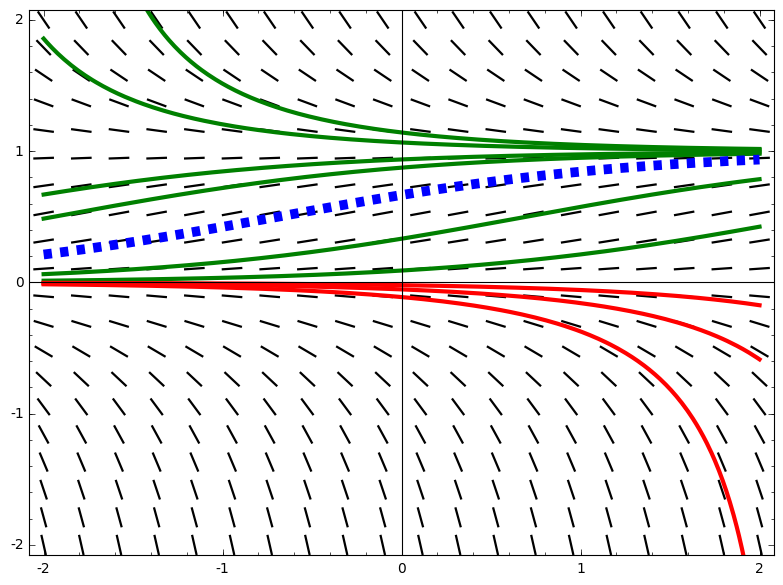

In [108]:
x, t, C = var('x y C')
f = x - x^2
sf = plot_slope_field(
    f, 
    (t, -2, 2),
    (x, -2, 2)
)
stbl = plot(
    [1/(1+(exp(-t)/C)) for C in [-16, -8, 0.1, 0.5, 7, 15]], 
    (-2, 2), ymin=-2, ymax=2,
    thickness=3,
    color = 'green'
)
unbdd = plot(
    [1/(1+(exp(-t)/C)) for C in [-0.02, -0.05, -0.1]], 
    (-2, 2), ymin=-2, ymax=2,
    thickness=3,
    color = 'red'
)
psol = plot(
    2/(2+exp(-t)),
    (-2, 2), ymin=-2, ymax=2,
    thickness=7,
    color = 'blue',
    linestyle = '--'
)
show(sf + stbl + unbdd + psol)

### Prob 7

Consider the IVP $x' = 4x(7-x)$ with $x(0)=11$. This is a separable first order DE. We write
$$
    \int \frac{\dd{x}}{x(7-x)} = \int 4\dd{t}
$$ 

The LHS is $4t+\tilde{C}$. Using partial fractions for the RHS,
$$
    \int \frac17\left(\frac1x - \frac1{x-7}\right) \dd{x}  = \frac17\log\left|\frac x{x-7}\right|.
$$

From the two above, we find the implicit general solution
$$
    \frac x{x-7} = Ce^{28t}
$$

With $x(0) = 11$, $C = \frac{11}4$.

Isolating $x$, the explicit solution is
$$
    x(t) = \frac{77}{11 - 4\exp{-28t}}.
$$

This solution is plotted as a blue dashed line in the following figure.

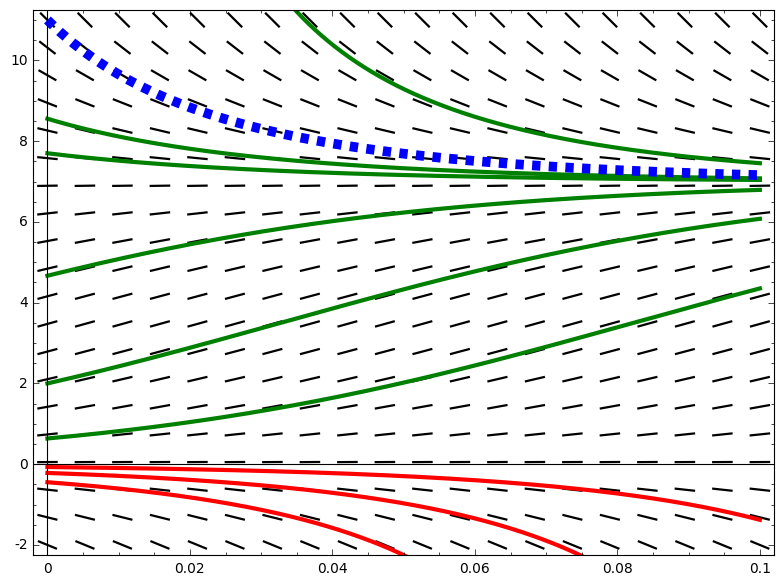

In [151]:
x, t, C = var('x t C')
f = 4*x*(7 - x)
sf = plot_slope_field(
    f, 
    (t, 0, 0.1),
    (x, -2, 11)
)
sols = plot(
    [(7*C)/(C-exp(-28*t)) for C in [11, 11/2, 1, -2, -0.1, -0.4]], 
    (0, 0.1), ymin=-2, ymax=11,
    thickness=3,
    color = 'green'
)
unbdd = plot(
    [(7*C)/(C-exp(-28*t)) for C in [0.01, 0.03, 0.06]], 
    (0, 0.1), ymin=-2, ymax=11,
    thickness=3,
    color = 'red'
)
psol = plot(
    (7*(11/4))/(11/4-exp(-28*t)),
    (0, 0.1), ymin=-2, ymax=11,
    thickness=7,
    color = 'blue',
    linestyle = '--'
)
show(sf + sols + unbdd + psol)

### Prob 12

Suppose a population of alligators $P$ satisfies $P' = kP^2$. This is a first order autonomous separable DE, with general solution
$$
    P(t) = \frac{-1}{kt+C}.
$$

Given two points $(12,0)$ and $(24,10)$ in the particular solution, we've a system of two equations with two unknowns.

$$
    P(0) = 12 \implies C = \frac{-1}{12}\\
    P(10) = 24 \implies k = \frac1{240}.
$$

Having determined our particular solution, we may proceed to ask at what time $\tau$ the population is $40$.
$$
\begin{align}
    P(\tau) = 40 &\implies 
        \frac{-1}{\frac1{240}\tau+\frac{-1}{12}} = 40\\ &\implies
        \tau = 14.
\end{align}
$$

Notice that $P$ blows up as $t \to 20$---there's a horizontal asymptote at $t = 20$.

We'll compute $P(14)$ to check the solution.

In [152]:
P = -1/(t/240-1/12)
P(14)

40

### Prob 23

We'll discuss the separable, autonomous DE $$x' = 0.8x - 0.004x^2.$$

First, let's consider the phase diagram ($x'$ plotted against $x$). There are two critical points, and thus two equilibrium solutions, $x = 0$ and $x = 200$. We can see that $x=0$ is a unstable equilibrium and $x = 200$ is a stable equilibrium.

It follows that, if we suppose $x(0) > 0$, the supremum of the $x(t)$ for all $t>0$ is $200$.

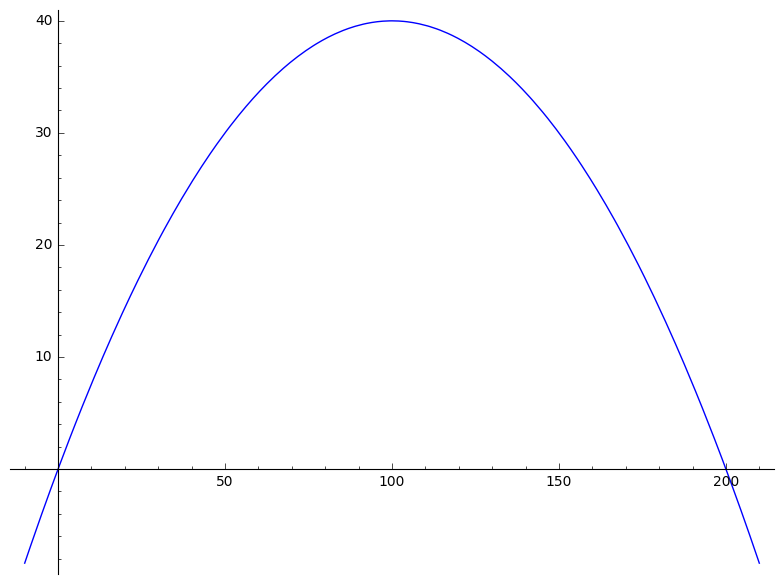

In [153]:
x = var('x')
plot(0.8*x - 0.004*x^2, (x, -10, 210))

Let's find a particular solution for this DE given the IC $x(0) = 50$.

Using partial fraction decomposition, we come to the implicit general solution 
$$
    \frac{x}{x-200} = C\exp{4t/5}.
$$

The IC requires $C = -1/3$. We proceed to find the explicit particular solution
$$
x(t) = \frac{200}{1 + 3\exp{-4t/5}}.
$$

Graphically, it seems $x$ reaches $100$ at $t=1.15$. Solving for $\tau$ such that $x(\tau) = 100$, we find that $$\tau = \frac{5\log{3}}{4} \approx 1.373.$$

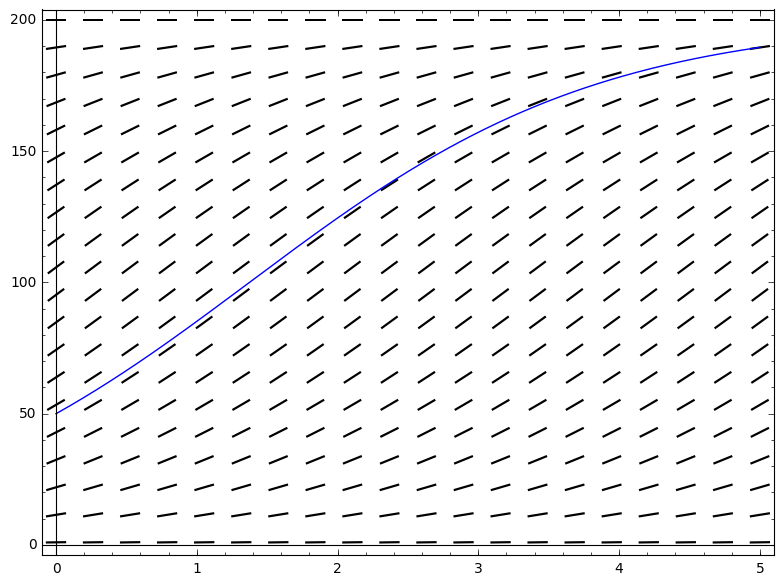

In [170]:
x, t = var('x t')
f = 0.8*x - 0.004*x^2
sf = plot_slope_field(
    f, 
    (t, 0, 5),
    (x, 1, 200)
)
psol = plot(
    200/(1 + 3*exp(-4*t/5)),
    (0, 5), ymin=0, ymax=200
)
show(sf + psol)

### Prob 32

We derive the solution of the logistic IVP $P' = kP(M-P), P(0) = P_0$. To begin, we notice that DE in question is autonomous, first order, and separable. 

To integrate, we write:
$$
    \int\frac{\dd{P}}{P(M-P)} = \int k\dd{t}.
$$ 
The RHS is $kt+ \tilde{C}$. The LHS is subject to partial fraction decomposition
$$
\begin{align}
    \int\frac{\dd{P}}{P(M-P)}\dd{P} 
        &= \int \frac1M\left(\frac{1}{P} + \frac1{M-P}\right)\\
        &= \frac1M \log\left|\frac P{M-P}\right|.
\end{align}
$$ 

Equating the RHS and LHS, and exponentiating, we find the implicit general solution
$$
    C\exp{kMt} = \frac{P}{M-P}, \qquad \text{with } C \in \RR
$$
**Note:** $C$ may take on any value in $\RR$, to compensate for the dropped absolute value signs. From the initial condition $P(0) = P_0$, it follows that $C = \frac{P_0}{M-P_0}$.

Isolating $P$, we have the explicit particular solution
$$
    P(t) = \frac M{1+\frac1Ce^{-kMt}} = \frac{MP_0}{P_0+(M-P_0)e^{-kMt}}
$$

**Note:** For both $0<P_0<M$ and $P_0> M$ we have 
$$
    \lim_{t \to \infty}P(t) = M,
$$
which corresponds with a brief stability analysis: $P = 0$ is an unstable equilibrium, $P = M$ is a stable equilibrium.

## Aside

Here's a lessson that the *particular* antiderivative (primitive) we choose for the integrating factor may arbitrarily differ by a constant. I was certain that either I or `sage` was mucking up the indefinite integral
$$
    \int \frac{dt}{12+5t} = \frac{1}{5}\log(12+5t) + C
$$ 
because *I could find*
$$
     \int \frac{dt}{12+5t} = \frac{1}{5}\log\left(\frac{12}{5}+t\right) + \tilde{C},
$$

until I realized that both primitives above differed by only a constant, $\frac{\log{5}}{5}$.

It's also a lesson that `sage` has a preference to factor before integrating. I choose to examine different cases $m = 1, 2, \ldots$, as if to *catch* `sage` in the act of *not dividing* $5$ out of $12$.

Here's a plot of the functions.

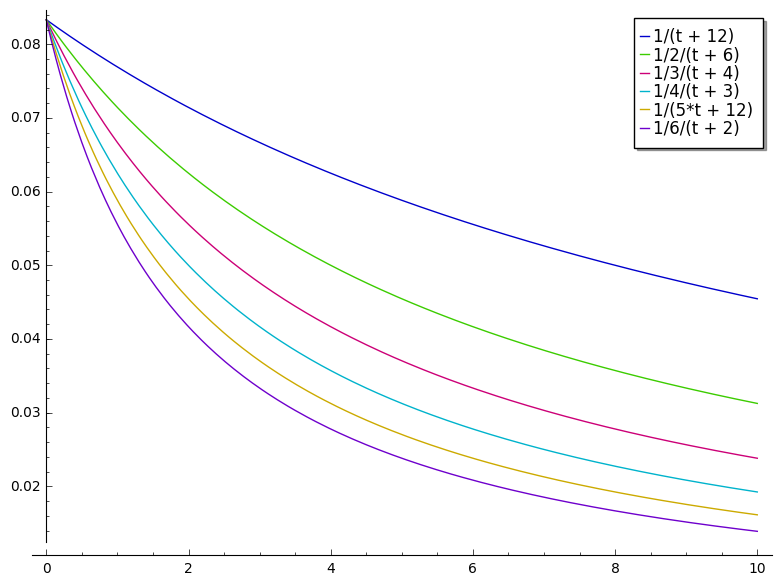

In [35]:
plot([(12+(m*t))^(-1) for m in [1..6]], (t,0,10), legend_label='automatic')

Here's dread plot of the primitives that `sage` found symbolically. (Notice that $m = 5$ just seems terribly out of order.)

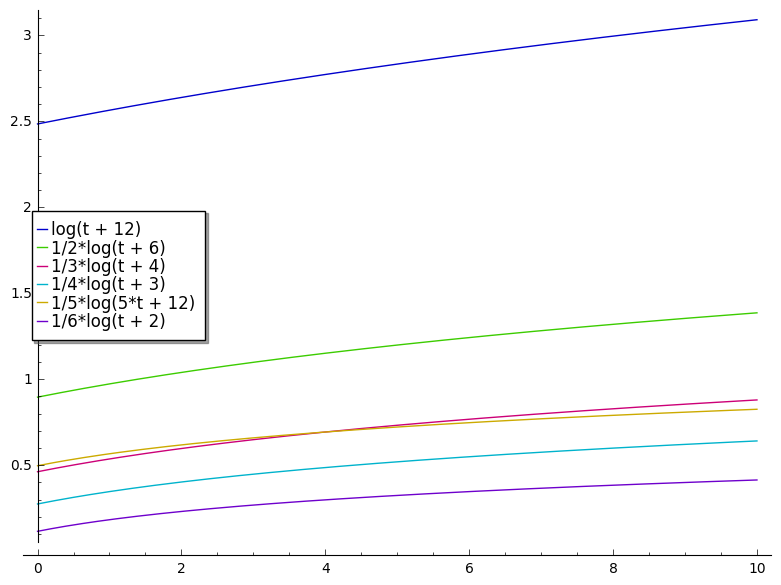

In [34]:
plot([integrate((12+(m*t))^(-1), t) for m in [1..6]], (t,0,10), legend_label='automatic')

I couldn't deal with the malalignment. So I forced my own interpretation of how `sage` should've symbolically integrated (to keep the order, sheesh).

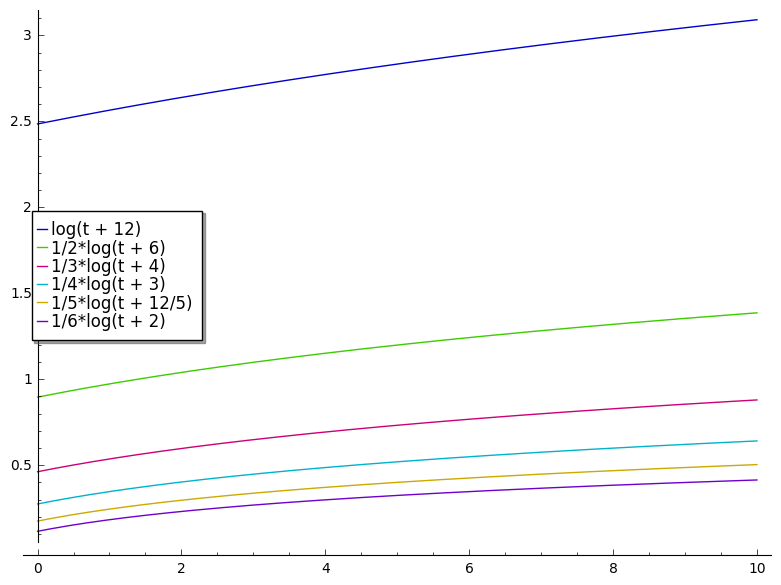

In [44]:
plot([log(t + 12), 1/2*log(t + 6), 1/3*log(t + 4), 1/4*log(t + 3), 1/5*log(t + 12/5), 1/6*log(t + 2)], (t,0,10), legend_label='automatic')

Then, after trying to phrase the question for stack exchange, I realized that indeed, the two functions in question only differed by a constant.

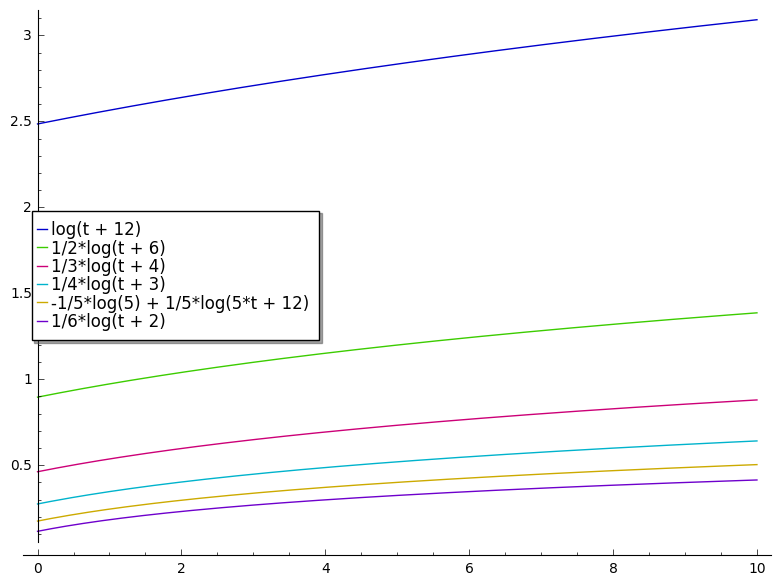

In [43]:
plot([log(t + 12), 1/2*log(t + 6), 1/3*log(t + 4), 1/4*log(t + 3), 1/5*(log(5*t + 12)-log(5)), 1/6*log(t + 2)],  (t,0,10), legend_label='automatic')

All this to say, I must *remember*
- $\log{ab} = \log{a} + \log{b}$ and
- there are infinitely many primatives (which differ by a constant) for a given function.